In [38]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score
from sklearn.svm import SVC,SVR
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

### Data Cleaning and Analysis

In [39]:
churn_df = pd.read_csv('Telco-Customer-Churn.csv')

In [40]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No na found

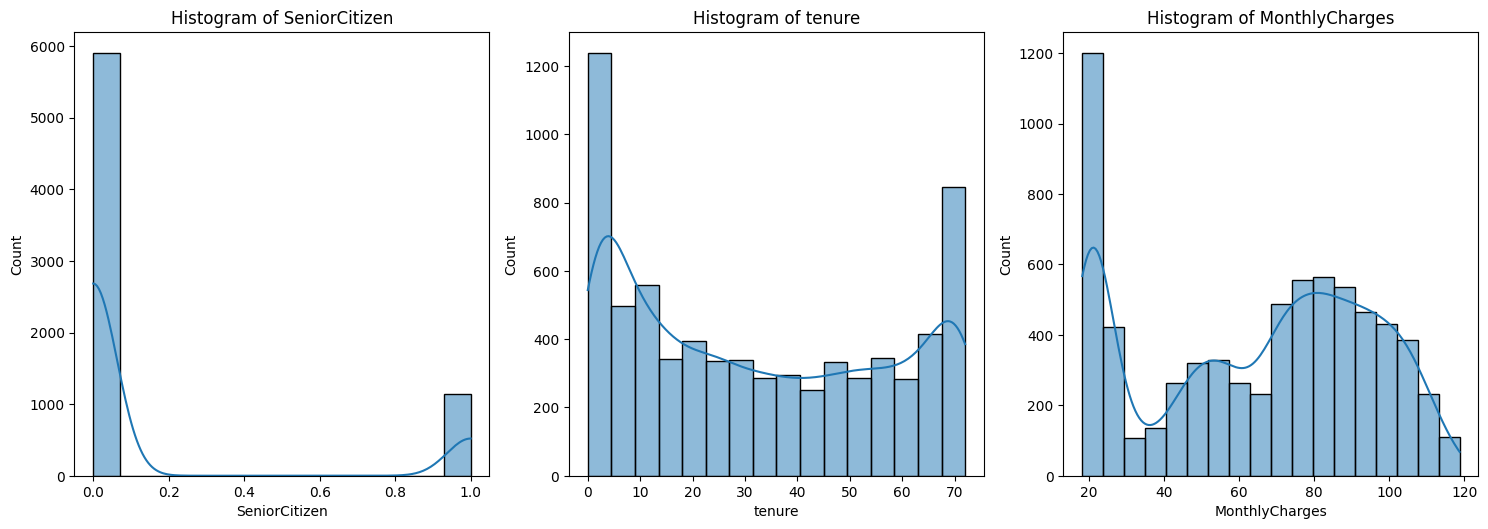

In [43]:
churn_mod = churn_df.select_dtypes(include=['int64', 'float64', 'int32'])
num_plots = len(churn_mod.columns)

fig, axes = plt.subplots(num_plots, 3, figsize=(15, num_plots * 5)) #making a grid of plots so we dont execute the same code multiple times

axes = axes.flatten()

for i, col in enumerate(churn_mod.columns):
    sns.histplot(churn_mod[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) #deletes all the empty graphs at the end

plt.tight_layout()
plt.show()

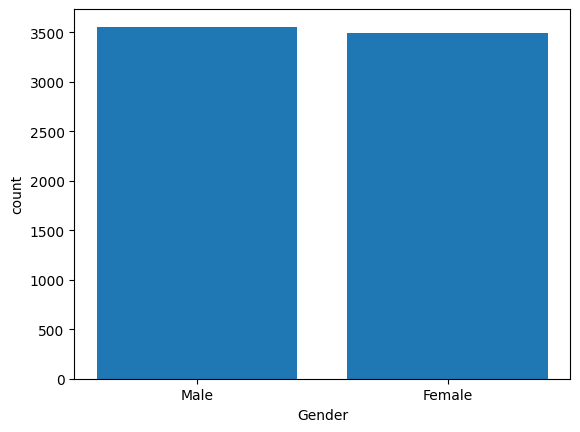

In [44]:
gender = churn_df['gender'].value_counts()
plt.bar(gender.index,gender)
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

# Dsiplay the plot
plt.show()

<Axes: >

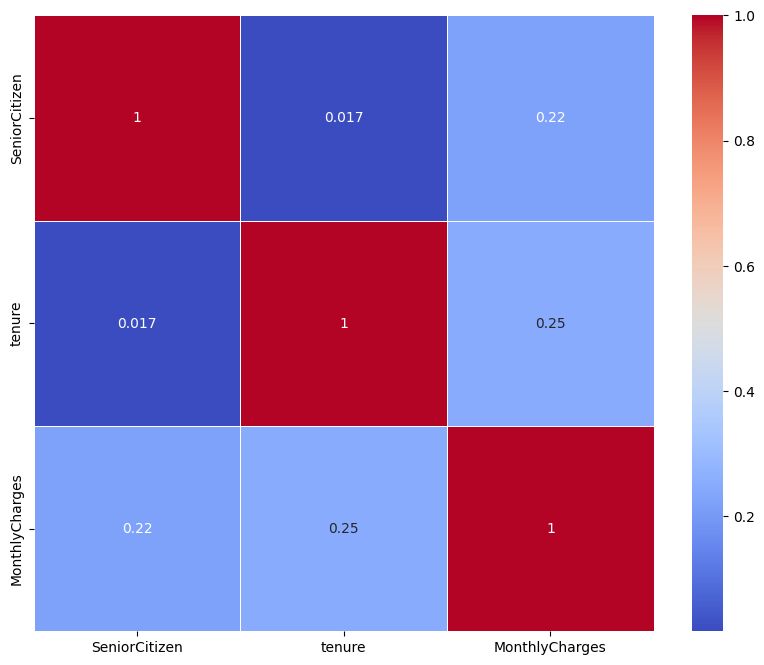

In [45]:
corr = churn_mod.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

no strong correlations which is good since there doesnt seem to be redundancy

<Axes: xlabel='Churn', ylabel='PaymentMethod'>

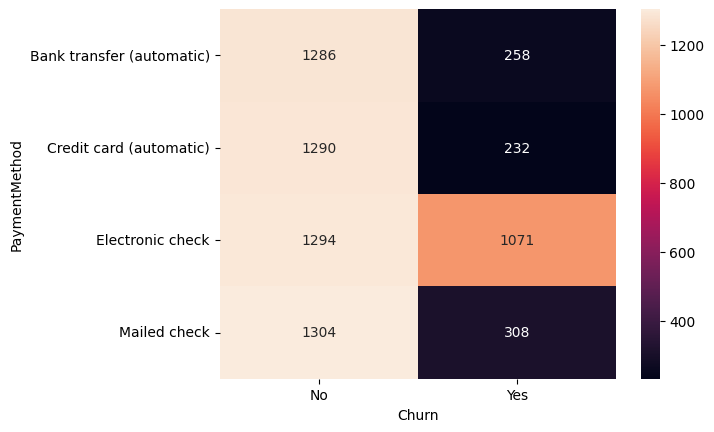

In [46]:
sns.heatmap(pd.crosstab(churn_df['PaymentMethod'], churn_df['Churn']), annot=True, fmt='d')

In [47]:
for col in churn_df.columns:
    print(churn_df.groupby(col)['Churn'].count())


customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: Churn, Length: 7043, dtype: int64
gender
Female    3488
Male      3555
Name: Churn, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: Churn, dtype: int64
Partner
No     3641
Yes    3402
Name: Churn, dtype: int64
Dependents
No     4933
Yes    2110
Name: Churn, dtype: int64
tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: Churn, Length: 73, dtype: int64
PhoneService
No      682
Yes    6361
Name: Churn, dtype: int64
MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: Churn, dtype: int64
InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: Churn, dtype: int64
OnlineSecurity
No                     3498
No internet service    1526
Yes                    20

In [48]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [49]:
churn_df.drop(columns='customerID',inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
print(churn_df['Contract'].unique())
print(churn_df['PaymentMethod'].unique())
print(churn_df['InternetService'].unique())
print(churn_df['MultipleLines'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['DSL' 'Fiber optic' 'No']
['No phone service' 'No' 'Yes']


In [51]:
churn_df_new = churn_df.copy()

In [52]:
label_encoder = LabelEncoder()
churn_df_new['Churn'] = churn_df_new['Churn'].apply(lambda x: 0 if x=='No' else 1)
churn_df_new['Partner'] = label_encoder.fit_transform(churn_df_new['Partner'])
churn_df_new['Dependents'] = label_encoder.fit_transform(churn_df_new['Dependents'])
churn_df_new['PhoneService'] = label_encoder.fit_transform(churn_df_new['PhoneService'])
churn_df_new['MultipleLines'] = label_encoder.fit_transform(churn_df_new['MultipleLines'])
churn_df_new['InternetService'] = label_encoder.fit_transform(churn_df_new['InternetService'])
churn_df_new['OnlineSecurity'] = label_encoder.fit_transform(churn_df_new['OnlineSecurity'])
churn_df_new['MultipleLines'] = label_encoder.fit_transform(churn_df_new['MultipleLines'])
churn_df_new['OnlineBackup'] = label_encoder.fit_transform(churn_df_new['OnlineBackup'])
churn_df_new['DeviceProtection'] = label_encoder.fit_transform(churn_df_new['DeviceProtection'])
churn_df_new['TechSupport'] = label_encoder.fit_transform(churn_df_new['TechSupport'])
churn_df_new['StreamingTV'] = label_encoder.fit_transform(churn_df_new['StreamingTV'])
churn_df_new['StreamingMovies'] = label_encoder.fit_transform(churn_df_new['StreamingMovies'])
churn_df_new['Contract'] = label_encoder.fit_transform(churn_df_new['Contract'])
churn_df_new['PaperlessBilling'] = label_encoder.fit_transform(churn_df_new['PaperlessBilling'])
churn_df_new['PaymentMethod'] = label_encoder.fit_transform(churn_df_new['PaymentMethod'])
churn_df_new['gender'] = label_encoder.fit_transform(churn_df_new['gender'])
churn_df_new.head()





,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
num_cols = churn_df_new.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)

minmax = MinMaxScaler()
churn_df_new[num_cols] = minmax.fit_transform(churn_df_new[num_cols])
churn_df_new.head()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,29.85,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,1889.5,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,108.15,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,1840.75,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,151.65,1.0


In [54]:
churn_df_new['TotalCharges'] = pd.to_numeric(churn_df_new['TotalCharges'], errors='coerce')
churn_df_new[churn_df_new.isna().any(axis=1)].count()

gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges         0
Churn               11
dtype: int64

We find that 11 values are non-numeric so we can just remove those rows

In [55]:
churn_df_new.dropna(axis=0,inplace=True)

In [56]:
churn_df_new.shape

(7032, 20)

### Logistic Regression

In [57]:
def runLogistic(df,smote=False): #creating a function for later when I want to play around with the dataframe
    X = df.drop(['Churn'],axis=1)
    y = df['Churn']
    if smote == True:
        smoteobj = SMOTE()
        X_f, y_f = smoteobj.fit_resample(X=X, y= y)
    else:
        X_f = X
        y_f= y
    X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.2)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    print(f'Accuracy: {accuracy_score(y_test,y_pred)}, Precision: {precision_score(y_test,y_pred)}, Recall: {recall_score(y_test,y_pred)}, F1: {f1_score(y_test,y_pred)}')
    print('\n\n\n')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

Accuracy: 0.806680881307747, Precision: 0.6645161290322581, Recall: 0.5508021390374331, F1: 0.6023391812865497






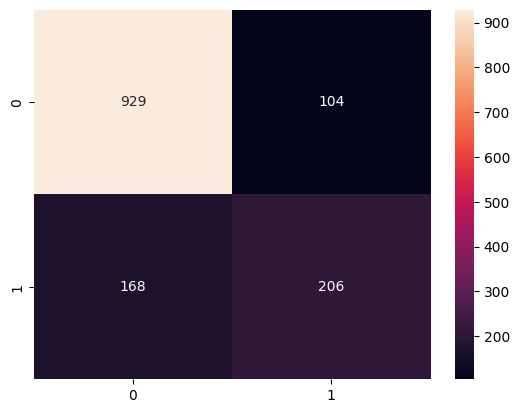

In [58]:
runLogistic(churn_df_new)

### SVM

In [59]:
def getClassifier(ktype):
    if ktype == 0:
        return SVC(kernel='linear')        
    elif ktype == 1:
        return SVC(kernel='poly')
    elif ktype == 2:
        return SVC(kernel='rbf')

In [60]:
def runGrid(df, smote = False): #creating a function for later when I want to play around with the dataframe
    kernels = ["Linear","Polynomial","RBF"]
    X = df.drop(['Churn'],axis=1)
    y = df['Churn']
    if smote == True:
        smoteobj = SMOTE()
        X_f, y_f = smoteobj.fit_resample(X=X, y= y)
    else:
        X_f = X
        y_f= y
    X_train, X_test, y_train, y_test = train_test_split(X_f, y_f, test_size=0.2)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    for i in range(len(kernels)):
        svclassifier = getClassifier(i)
        svclassifier.fit(X_train, y_train)
        y_pred = svclassifier.predict(X_test)
        print("Evaluation:", kernels[i], "kernel")
        print(classification_report(y_test,y_pred))
    param_grid = {'kernel': ['linear', 'poly','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
    grid.fit(X_train,y_train)
    grid_predictions = grid.predict(X_test)
    print(classification_report(y_test,grid_predictions))
    print(grid.best_params_)
    print('\n\n\n')
    print(f'The best kernel is: {grid.best_params_['kernel']} with an accuracy of {accuracy_score(y_test,grid_predictions)}')

    print(sns.heatmap((confusion_matrix(y_test,grid_predictions)),annot=True,fmt='d'))

Evaluation: Linear kernel
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1009
         1.0       0.70      0.53      0.60       398

    accuracy                           0.80      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1009
         1.0       0.68      0.45      0.54       398

    accuracy                           0.79      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1009
         1.0       0.70      0.46      0.55       398

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.71      

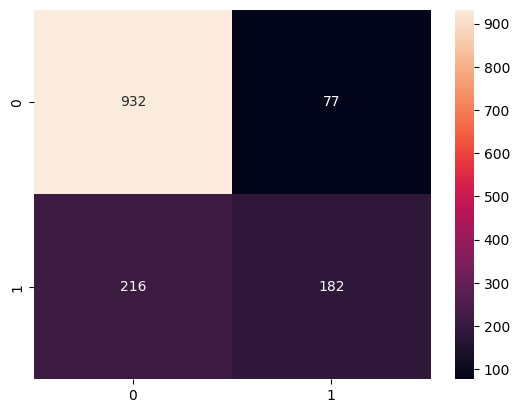

In [61]:
runGrid(churn_df_new)

### dataset tuning

In [62]:
churn_undersampling = churn_df_new.copy()

In [63]:
df_majority = churn_undersampling[churn_undersampling['Churn'] == 0]
df_minority = churn_undersampling[churn_undersampling['Churn'] == 1]
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority))
churn_undersampling = pd.concat([df_majority_downsampled, df_minority])

Accuracy: 0.7754010695187166, Precision: 0.7752525252525253, Recall: 0.7953367875647669, F1: 0.7851662404092071






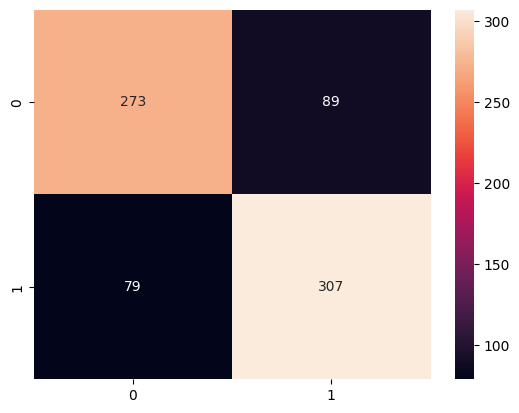

In [64]:
runLogistic(churn_undersampling)

Evaluation: Linear kernel
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74       375
         1.0       0.72      0.82      0.77       373

    accuracy                           0.75       748
   macro avg       0.76      0.75      0.75       748
weighted avg       0.76      0.75      0.75       748

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73       375
         1.0       0.72      0.78      0.75       373

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748

Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.74       375
         1.0       0.73      0.78      0.75       373

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74      

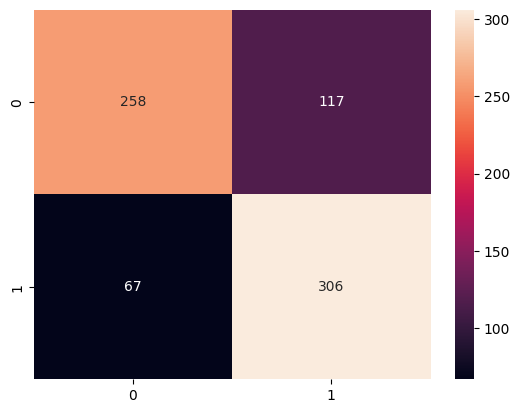

In [65]:
runGrid(churn_undersampling)

Accuracy: 0.760406582768635, Precision: 0.7395833333333334, Recall: 0.8137535816618912, F1: 0.7748976807639836






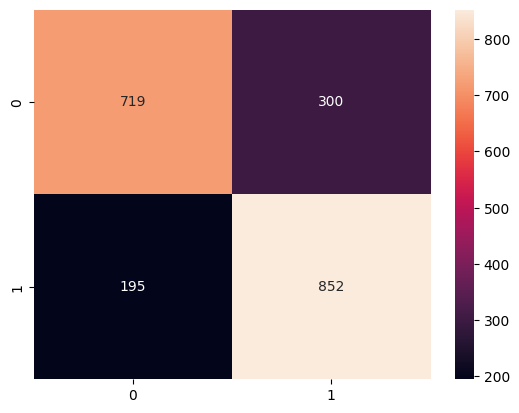

In [66]:
runLogistic(churn_df_new,smote=True)

Evaluation: Linear kernel
              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77      1051
         1.0       0.74      0.84      0.79      1015

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      1051
         1.0       0.77      0.86      0.81      1015

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1051
         1.0       0.84      0.83      0.83      1015

    accuracy                           0.84      2066
   macro avg       0.84      0.84      0.84      

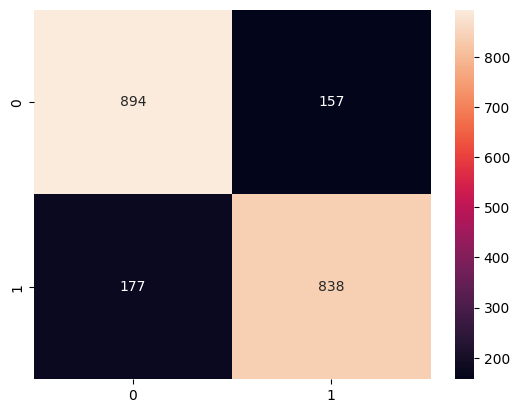

In [67]:
runGrid(churn_df_new,smote=True)

At the end we find the best thing to do is SMOTE (oversampling technique) and using the SVM RBF kernel. Dropping id column is a given since it contributed nothing. Some other things that can be investigated is log scaling since the variables dont seem to be exactly normal